<a href="https://colab.research.google.com/github/yousefayyash92/DDOS-Detection/blob/main/DDoS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proposed Algoritm
## Data collection
Based on the literature review above, the key information that could be extracted from the research is the importance of choosing a balanced dataset with a wide set of features that represents real-life conditions, if not actual real data.

The dataset you provided, named "DDoS SDN dataset," consists of 104,345 rows and 23 columns. It includes the following features:

1. dt: Date and time of the network 2. traffic observation.
3. switch: Identifier of the network switch.
4. src: Source IP address of the network traffic.
5. dst: Destination IP address of the network traffic.
6. pktcount: Total packet count for the observed traffic.
7. bytecount: Total byte count for the observed traffic.
8. dur: Duration of the network traffic.
9. dur_nsec: Nanosecond precision duration of the network traffic.
10. tot_dur: Total duration of the network traffic.
11. flows: Total number of flows observed.
12. packetins: Number of packets inspected.
13. pktperflow: Average number of packets per flow.
14. byteperflow: Average number of bytes per flow.
15. pktrate: Packet rate for the observed traffic.
16. Pairflow: Pair flow count.
17. Protocol: Protocol used in the network traffic.
18. port_no: Network port number.
tx_bytes: Number of transmitted bytes.
19. rx_bytes: Number of received bytes.
20. tx_kbps: Transmission rate in kilobits per second.
21. rx_kbps: Reception rate in kilobits per second.
22. tot_kbps: Total rate in kilobits per second.
23. label: Target variable indicating whether the traffic is malicious (1) or real (0).

This dataset contains three categorical features and 20 numeric features, including the target variable (label). The objective of your task is to classify whether the network traffic is normal or not using classical machine learning algorithms.

 the "DDoS SDN dataset" was chosen for its relevance to DDoS attack analysis and comprehensive features,  making it a valuable resource for studying and developing machine learning-based approaches to network traffic classification and security.

## Setup the enviroment

 Next, the enviroment will have to be setup. Since most of the pip libraries that will be used are already available and installed on colab. We will start by importimg the necessary libraries:

 1. Panda
 2. Scikit-learn
 3. google colab (for loading the dataset)
 4. Seaborn
 5. imblearn

 The libraries can be loaded  as shown in the code below:

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from google.colab import drive
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler

Afterwards, the dataset has to be uploaded, the choosen dataset was upload to google drive. Therefore, it can be loaded as show below:

In [ ]:
drive.mount('/content/drive')
path = '/content/drive/MyDrive/dataset_sdn.csv'
df = pd.read_csv(path)

Mounted at /content/drive


FileNotFoundError: ignored

Then, to visualize the better understand the dataset, we must run the lines of code below for them to offer us a better understanding of the data.

In [ ]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [ ]:
df.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [ ]:
df['label'].value_counts()

NameError: ignored

In [ ]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


<ipython-input-52-753ca5bff919>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

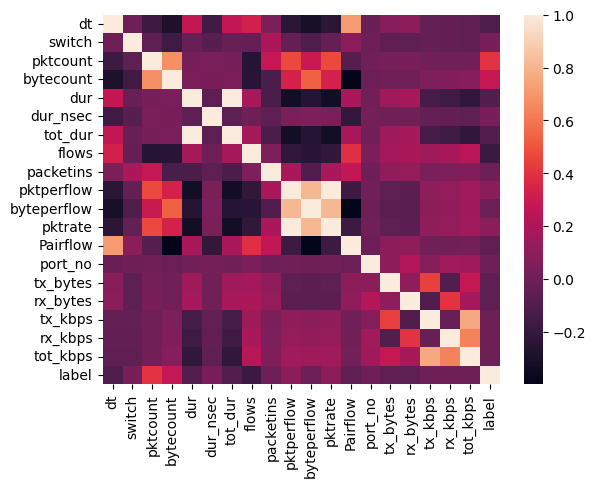

In [ ]:
corr = df.corr()
sns.heatmap(corr)

The Dataset is slighlty imbalanced at a 60-40 real vs malicious traffic. Also we have null values in:
1. rx_kbps
2. tot_kbps  

Also, the desciption shows we have a wide range of data, with intresting behaviour. For examples, the pktcount shows a huge jump from 75% to max(from 94796.000000 to 260006.000000	). We could also see high jumps in the values of other data, but this may or may not be related to ourliers. Also, protocol feature is categorical, but we will have to turn into a numericla value in the preprocessing. We can also notice the data in other places being wrong.

As for the heatmap, the information we can take out of it are: pktcount and pktbyte have the highest relationship with label, while flows has the lowest colleration with the label value. While the rest have a lower amount colleration with label. Even our best case features are that well performing colleration wise. As the best case colleration was label and pktcount at 0.5.

## Preprocessing
With the findings from the data above, we can conclude that we could preprocess the data by:

1. Handling missing values: We can achieve that by droping the rows where the missing values are, since the number of missing values in small in comparison to the dataset.


In [ ]:
df = df.dropna()

2. Encode categorical features: the feature "protocol" has to be turned into numberical as discussed above.Also, there is the src and dest as ip's are string, they will have to be turned into numbers

In [ ]:
df = pd.get_dummies(df, columns=['Protocol'])
df['src'] = df['src'].apply(lambda ip: int(''.join([bin(int(x)+256)[3:] for x in ip.split('.')]), 2))
df['dst'] = df['dst'].apply(lambda ip: int(''.join([bin(int(x)+256)[3:] for x in ip.split('.')]), 2))

3. Feature Standarization: Features like bytecount, pktcount, dur, dur_nsec, tot_dur, etc. have very large values compared to other features and huge jumps in the value. We will have to standarized the data into a standard range using sckit-learn StandardScalar.

In [ ]:
scaler = StandardScaler()
df[['bytecount', 'pktcount', 'dur', 'dur_nsec', 'tot_dur', 'tx_bytes', 'rx_bytes']] = scaler.fit_transform(df[['bytecount', 'pktcount', 'dur', 'dur_nsec', 'tot_dur', 'tx_bytes', 'rx_bytes']])

5. Handling imbalanced dataset: As discussed earlier, the dataset is considered imbalanced and we will have to imbalance it and we will be achieving so be undersample the data.

In [ ]:
x = df.drop('label', axis=1)
y = df['label']
rus = RandomUnderSampler(random_state=42)
x_res, y_res = rus.fit_resample(x, y)

6. Splitting the data: finally we will be splitting the data randomly into 80% training and 20% test data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size=0.2, random_state=42)


In [ ]:
print(len(x_train))
print(len(x_test))

64806
16202


## Training the model
Next we will be training the model. The chosen algoritm is a random forest as it was shown to be the best implimentation based on the literature review.

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=30, random_state=42)

## Evaluating the model:
To evaluate the model we will run the model against the test data we have sampled. Then we will be producing a Classification Report,confusin matrix and an accuracy score.

To get the prediction:

In [ ]:
pred = model.predict(x_test)

Classification report:

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8116
           1       1.00      1.00      1.00      8086

    accuracy                           1.00     16202
   macro avg       1.00      1.00      1.00     16202
weighted avg       1.00      1.00      1.00     16202



Confusion Matrix:

In [ ]:
print(confusion_matrix(y_test, pred))

[[8113    3]
 [   0 8086]]


Accuracy Score:

In [ ]:
print(accuracy_score(y_test, pred))

0.9998148376743612


based on the data above, the model achieved an impressive result, the metrics were:

*   f1-score: 1
*   precision: 1
* recall: 1
* accuracy: 0.9998 (to 4 significant figures)

the model did achieve an impressive result, but it still has to be compared to other algorithms and prior work